<a href="https://colab.research.google.com/github/Oblongpotato/AI-Powered-Facial-Expressions-Transformation/blob/main/Stable_Diffusion_(Image_to_image).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import torch
from diffusers import StableDiffusionImg2ImgPipeline
from PIL import Image
from huggingface_hub import login
from IPython.display import display


In [25]:
def setup_img2img_pipeline():
    # Login to Hugging Face
    auth_token = "PASTE_YOUR_HUGGING_FACE_AUTH_TOKEN_HERE" # Replace with your auth token
    login(token=auth_token)

    pipe = StableDiffusionImg2ImgPipeline.from_pretrained(
        "runwayml/stable-diffusion-v1-5",
        torch_dtype=torch.float16,
    )
    pipe = pipe.to("cuda")
    return pipe


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Generating variations...
Generating variation 1...


  0%|          | 0/10 [00:00<?, ?it/s]

Variation 1 complete
Generating variation 2...


  0%|          | 0/12 [00:00<?, ?it/s]

Variation 2 complete
Generating variation 3...


  0%|          | 0/15 [00:00<?, ?it/s]

Variation 3 complete

Displaying results:
Original image:


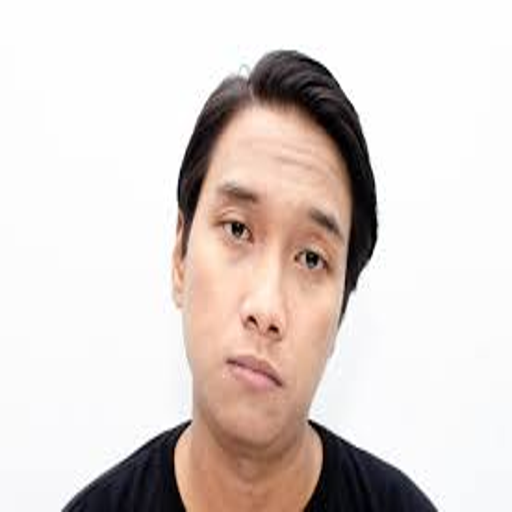


Variation 1:


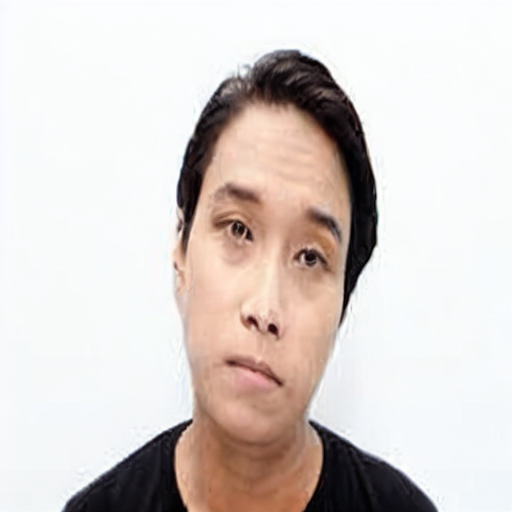


Variation 2:


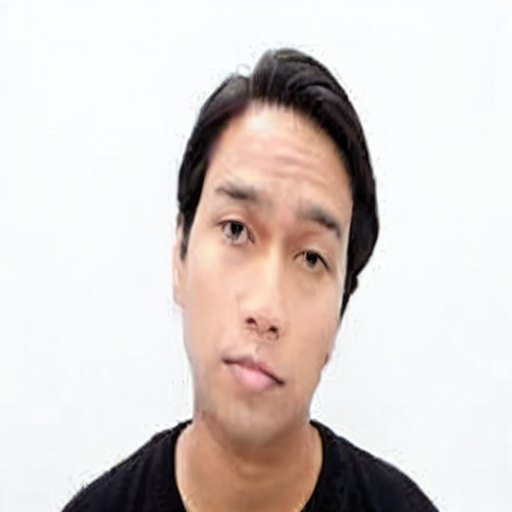


Variation 3:


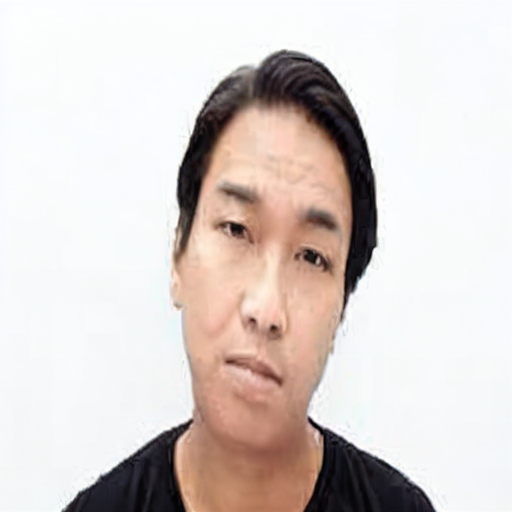

In [37]:
def process_image(pipe, init_image, strength=0.25):
    prompt = ("exact same photograph, identical pose and position, same exact background, "
             "keep identical scene composition, same clothing and accessories, "
             "subtle modification: slightly more confident expression, "
             "natural realistic human eyes with same eye color, "
             "gentle confident smile, maintain exact head position, "
             "hyperrealistic, photographic, ultra-detailed")

    negative_prompt = ("deformed eyes, fake eyes, unrealistic eyes, asymmetric eyes, "
                      "different pose, different position, different background, "
                      "different clothing, different composition, blurry, "
                      "different camera angle, warped features, anime eyes, "
                      "3d render, cartoon, painting, artificial")

    with torch.autocast("cuda"):
        output = pipe(
            prompt=prompt,
            negative_prompt=negative_prompt,
            image=init_image,
            strength=strength,
            guidance_scale=6.0,
            num_inference_steps=50
        ).images[0]

    return output

def generate_variations(input_image_path):
    # Setup pipeline
    pipe = setup_img2img_pipeline()

    # Load and prepare the input image
    init_image = Image.open(input_image_path)
    init_image = init_image.resize((512, 512))

    # Generate variations with different strengths
    strengths = [0.20, 0.25, 0.30]
    variations = []

    print("Generating variations...")

    # Store original image
    variations.append(init_image)

    # Generate and store each variation
    for i, strength in enumerate(strengths):
        print(f"Generating variation {i+1}...")
        variation = process_image(pipe, init_image, strength=strength)
        variations.append(variation)
        print(f"Variation {i+1} complete")

    return variations

# Now you can run this cell directly to see the results
input_image_path = "PASTE_YOUR_IMAGE_URL_HERE"  # Replace with your image path
variations = generate_variations(input_image_path)

# Display all images
print("\nDisplaying results:")
print("Original image:")
display(variations[0])
for i, img in enumerate(variations[1:], 1):
    print(f"\nVariation {i}:")
    display(img)